In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 预处理和特征工程
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 机器学习模型
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 自然语言处理
import nltk
from nltk.corpus import stopwords
import string

from test import df_train



In [11]:
# 加载数据
df = pd.read_csv('X_train.csv')

# 查看数据基本信息
print(df.head())
print(df.info())


        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                                                Text  S

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


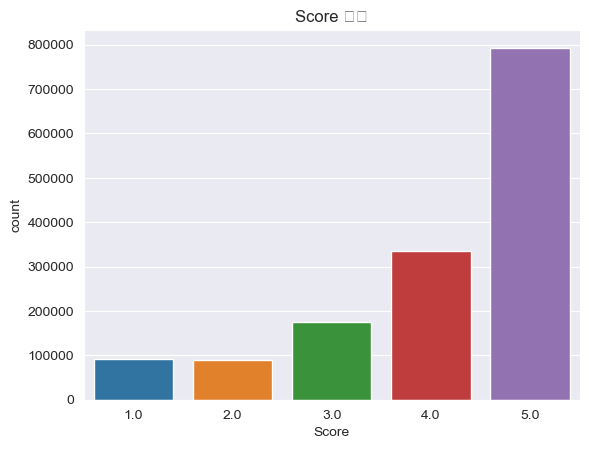

In [12]:
sns.countplot(x='Score', data=df)
plt.title('Score 分布')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('X_train.csv')


print("原始数据集前5行:")
print(df.head())


print("\n缺失值统计:")
print(df[['ProductId', 'Score']].isnull().sum())


df_clean = df.dropna(subset=['ProductId', 'Score']).copy()
print("\n清洗后的数据集大小:", df_clean.shape)
print(df_clean[['ProductId', 'Score']].isnull().sum())


product_score_counts = df_clean.groupby(['ProductId', 'Score']).size().reset_index(name='Count')
print("\n按 ProductId 和 Score 分组后的统计:")
print(product_score_counts.head())


product_score_pivot = product_score_counts.pivot(index='ProductId', columns='Score', values='Count').fillna(0).astype(int)
print("\n透视表前5行:")
print(product_score_pivot.head())


product_score_pivot.to_csv('product_score_counts.csv')
print("\n统计结果已保存到 'product_score_counts.csv'")


原始数据集前5行:
        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                                             

C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.tight_layout()
C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  plt.tight_layout()
C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  plt.tight_layout()
C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
C:\Users\gtl15\AppData\Local\Temp\ipykernel_19948\3356165940.py:42: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) miss

<Figure size 1200x800 with 0 Axes>

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

KeyboardInterrupt: 


缺失值统计:
ProductId    0
1.0          0
2.0          0
3.0          0
4.0          0
5.0          0
dtype: int64

统计结果:
   Threshold  Positive_Count  Total_Count  Proportion_Positive
0       40.0           39319        50052             0.785563
1       50.0           28377        50052             0.566950
2       60.0           20658        50052             0.412731
3       70.0           13857        50052             0.276852
4       80.0            6627        50052             0.132402
5       90.0            2739        50052             0.054723


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

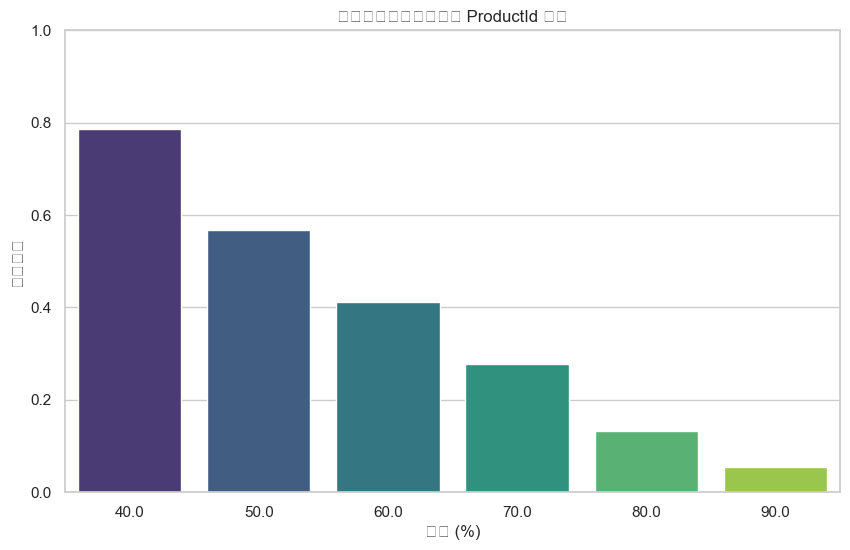

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

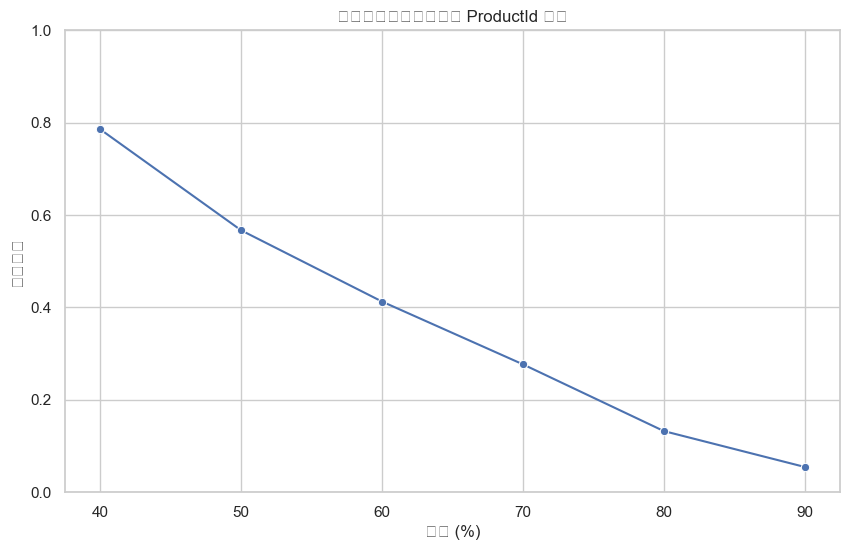

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取生成的 CSV 文件
df_scores = pd.read_csv('product_score_counts.csv')

# 显示前几行数据以确认
# print("数据集前5行:")
# print(df_scores.head())

# 检查缺失值
print("\n缺失值统计:")
print(df_scores[['ProductId'] + [col for col in df_scores.columns if col != 'ProductId']].isnull().sum())


score_columns = df_scores.columns.tolist()
score_columns.remove('ProductId')

df_scores['Total_Scores'] = df_scores[score_columns].sum(axis=1)


for score in score_columns:
    ratio_col = f'Ratio_{score}'
    df_scores[ratio_col] = df_scores[score] / df_scores['Total_Scores']

thresholds = [0.4, 0.5, 0.6,0.7,0.8,0.9]


threshold_results = {}

for threshold in thresholds:

    df_scores['Max_Ratio'] = df_scores[[f'Ratio_{score}' for score in score_columns]].max(axis=1)
    

    df_scores[f'Is_Mode_{threshold}'] = df_scores['Max_Ratio'] > threshold
    

    num_positive = df_scores[f'Is_Mode_{threshold}'].sum()
    num_total = df_scores.shape[0]
    proportion_positive = num_positive / num_total
    

    threshold_results[threshold] = {
        'Positive_Count': num_positive,
        'Total_Count': num_total,
        'Proportion_Positive': proportion_positive
    }


results_df = pd.DataFrame.from_dict(threshold_results, orient='index').reset_index()
results_df = results_df.rename(columns={'index': 'Threshold'})


results_df['Threshold'] = results_df['Threshold'] * 100

print("\n统计结果:")
print(results_df)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Threshold', y='Proportion_Positive', data=results_df, palette='viridis')
plt.title('不同阈值下存在众数的 ProductId 比例')
plt.xlabel('阈值 (%)')
plt.ylabel('正例比例')
plt.ylim(0, 1) 
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Threshold', y='Proportion_Positive', data=results_df, marker='o')
plt.title('不同阈值下存在众数的 ProductId 比例')
plt.xlabel('阈值 (%)')
plt.ylabel('正例比例')
plt.ylim(0, 1)
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('X_train.csv')


print("原始数据集前5行:")
print(df.head())


print("\n缺失值统计:")
print(df[['UserId', 'Score']].isnull().sum())


df_clean = df.dropna(subset=['UserId', 'Score']).copy()
print("\n清洗后的数据集大小:", df_clean.shape)
print(df_clean[['UserId', 'Score']].isnull().sum())


product_score_counts = df_clean.groupby(['UserId', 'Score']).size().reset_index(name='Count')
print("\n按 UserId 和 Score 分组后的统计:")
print(product_score_counts.head())


product_score_pivot = product_score_counts.pivot(index='UserId', columns='Score', values='Count').fillna(0).astype(int)
print("\n透视表前5行:")
print(product_score_pivot.head())


product_score_pivot.to_csv('UserID_score_counts.csv')
print("\n统计结果已保存到 'UserID_score_counts.csv'")


原始数据集前5行:
        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                                             


缺失值统计:
UserId    0
1.0       0
2.0       0
3.0       0
4.0       0
5.0       0
dtype: int64

计算后的数据集前5行:
                  UserId  1.0  2.0  3.0  4.0  5.0  Total_Scores  Ratio_1.0  \
0  A00295401U6S2UG3RAQSZ    0    0    0    5    0             5        0.0   
1   A00348066Q1WEW5BMESN    0    0    0    0    5             5        0.0   
2   A0040548BPHKXMHH3NTI    1    0    3    4    2            10        0.1   
3  A00438023NNXSDBGXK56L    0    2    1    1    1             5        0.0   
4   A0048168OBFNFN7WW8XC    0    0    0    0    8             8        0.0   

   Ratio_2.0  Ratio_3.0  Ratio_4.0  Ratio_5.0  
0        0.0        0.0        1.0        0.0  
1        0.0        0.0        0.0        1.0  
2        0.0        0.3        0.4        0.2  
3        0.4        0.2        0.2        0.2  
4        0.0        0.0        0.0        1.0  

统计结果:
   Threshold  Positive_Count  Total_Count  Proportion_Positive
0       40.0          106277       123957             0.857370
1   

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

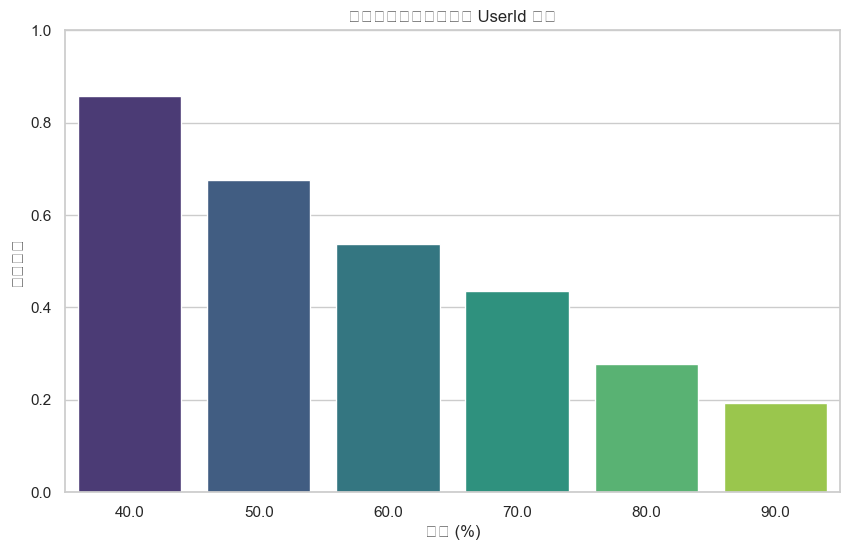

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

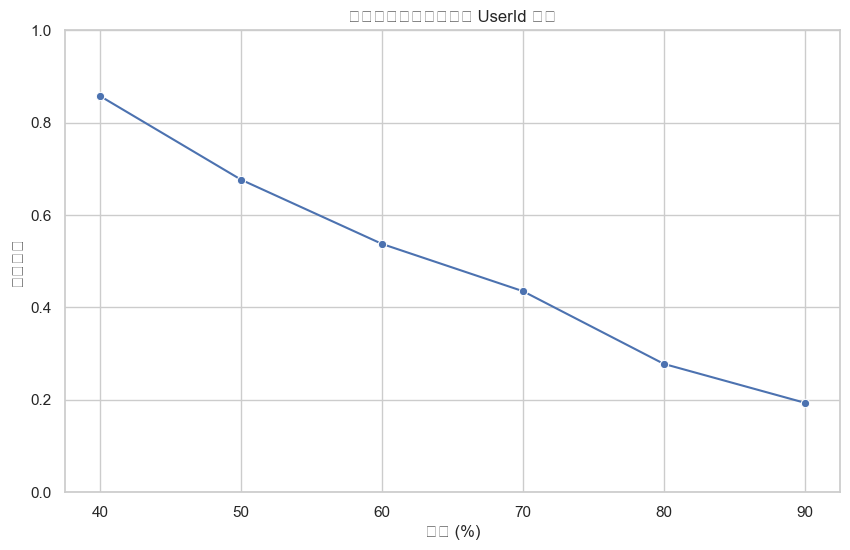

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_scores = pd.read_csv('UserId_score_counts.csv')


print("\n缺失值统计:")
print(df_scores[['UserId'] + [col for col in df_scores.columns if col != 'UserId']].isnull().sum())


score_columns = df_scores.columns.tolist()
score_columns.remove('UserId')  

df_scores['Total_Scores'] = df_scores[score_columns].sum(axis=1)


for score in score_columns:
    ratio_col = f'Ratio_{score}'
    df_scores[ratio_col] = df_scores[score] / df_scores['Total_Scores']


print("\n计算后的数据集前5行:")
print(df_scores.head())


thresholds = [0.4, 0.5, 0.6,0.7,0.8,0.9]


threshold_results = {}

for threshold in thresholds:
    df_scores['Max_Ratio'] = df_scores[[f'Ratio_{score}' for score in score_columns]].max(axis=1)
    
    df_scores[f'Is_Mode_{threshold}'] = df_scores['Max_Ratio'] > threshold
    
    num_positive = df_scores[f'Is_Mode_{threshold}'].sum()
    num_total = df_scores.shape[0]
    proportion_positive = num_positive / num_total
    
    threshold_results[threshold] = {
        'Positive_Count': num_positive,
        'Total_Count': num_total,
        'Proportion_Positive': proportion_positive
    }

results_df = pd.DataFrame.from_dict(threshold_results, orient='index').reset_index()
results_df = results_df.rename(columns={'index': 'Threshold'})

results_df['Threshold'] = results_df['Threshold'] * 100

print("\n统计结果:")
print(results_df)


# 数据可视化

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='Threshold', y='Proportion_Positive', data=results_df, palette='viridis')
plt.title('不同阈值下存在众数的 UserId 比例')
plt.xlabel('阈值 (%)')
plt.ylabel('正例比例')
plt.ylim(0, 1)  # 设置y轴范围为0到1
plt.show()

# 绘制折线图
plt.figure(figsize=(10, 6))
sns.lineplot(x='Threshold', y='Proportion_Positive', data=results_df, marker='o')
plt.title('不同阈值下存在众数的 UserId 比例')
plt.xlabel('阈值 (%)')
plt.ylabel('正例比例')
plt.ylim(0, 1)
plt.show()
